In [1]:
import numpy as np
import matplotlib.pylab as pl
import ot
# necessary for 3d plot even if not used
from mpl_toolkits.mplot3d import Axes3D  # noqa
from matplotlib.collections import PolyCollection  # noqa

In [2]:
problems = []

n = 100  # nb bins

# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
# Gaussian distributions
a1 = ot.datasets.make_1D_gauss(n, m=20, s=5)  # m= mean, s= std
a2 = ot.datasets.make_1D_gauss(n, m=60, s=8)

# creating matrix A containing all distributions
A = np.vstack((a1, a2)).T
n_distributions = A.shape[1]

# loss matrix + normalization
M = ot.utils.dist0(n)
M /= M.max()

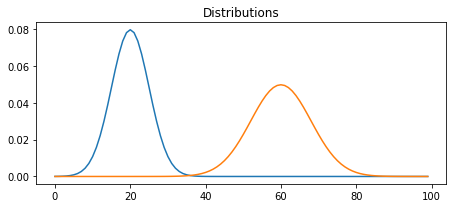

In [3]:
pl.figure(1, figsize=(6.4, 3))
for i in range(n_distributions):
    pl.plot(x, A[:, i])
pl.title('Distributions')
pl.tight_layout()

Elapsed time : 0.031373023986816406 s
Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 1700.336700337      
0.006776453137635   0.006776453137635   0.006776453137635   0.9932238647293  0.006776453137635   125.6700527544      
0.004018712867868   0.004018712867868   0.004018712867868   0.4301142633012  0.004018712867868   12.2659415009       
0.001172775061632   0.001172775061632   0.001172775061632   0.759993245501   0.001172775061632   0.3378536968906     
0.0004375137005401  0.0004375137005401  0.0004375137005401  0.6422331807992  0.0004375137005401  0.146842056636      
0.0002326690467318  0.0002326690467318  0.0002326690467318  0.5016999460969  0.0002326690467318  0.0938170323137     
7.43012167424e-05   7.43012167424e-05   7.43012167424e-05   0.7035962305808  7.43012167424e-05   0.05777870257152    
5.321227839861e-05 

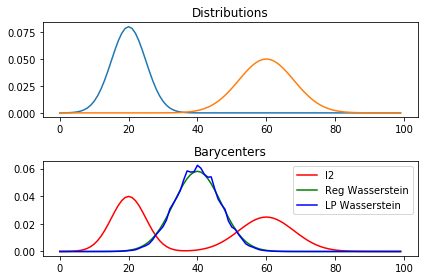

In [4]:
alpha = 0.5  # 0<=alpha<=1
weights = np.array([1 - alpha, alpha])

# l2bary
bary_l2 = A.dot(weights)

# wasserstein
reg = 1e-3
ot.tic()
bary_wass = ot.bregman.barycenter(A, M, reg, weights)
ot.toc()


ot.tic()
bary_wass2 = ot.lp.barycenter(A, M, weights, solver='interior-point', verbose=True)
ot.toc()

pl.figure(2)
pl.clf()
pl.subplot(2, 1, 1)
for i in range(n_distributions):
    pl.plot(x, A[:, i])
pl.title('Distributions')

pl.subplot(2, 1, 2)
pl.plot(x, bary_l2, 'r', label='l2')
pl.plot(x, bary_wass, 'g', label='Reg Wasserstein')
pl.plot(x, bary_wass2, 'b', label='LP Wasserstein')
pl.legend()
pl.title('Barycenters')
pl.tight_layout()

problems.append([A, [bary_l2, bary_wass, bary_wass2]])

In [5]:
a1 = 1.0 * (x > 10) * (x < 50)
a2 = 1.0 * (x > 60) * (x < 80)

a1 /= a1.sum()
a2 /= a2.sum()

# creating matrix A containing all distributions
A = np.vstack((a1, a2)).T
n_distributions = A.shape[1]

# loss matrix + normalization
M = ot.utils.dist0(n)
M /= M.max()

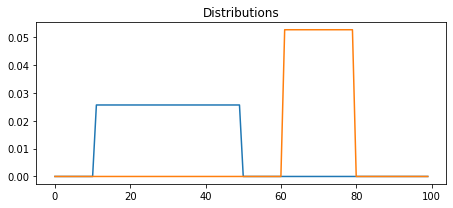

In [6]:
pl.figure(1, figsize=(6.4, 3))
for i in range(n_distributions):
    pl.plot(x, A[:, i])
pl.title('Distributions')
pl.tight_layout()